In [4]:
import numpy as np
import scipy.linalg as spla
import matplotlib as mpl
import matplotlib.pyplot as plt

# Oscilador armónico

Nuestra tercera práctica se va a centrar en otro de los sistemas modelo   que podemos resolver analíticamente, el oscilador armónico. En este sistema la partícula objeto de estudio se encuentra sometida a un potencial $V=1/2kx^2$. 

Empezamos como en el caso anterior con una serie de definiciones

In [5]:
# atomic units
hbar = 1.0
m = 1.0
# set precision of numerical approximation
steps = 2000

A continuación definimos la constante de muelle de nuestro oscilador armómico y los límites en el eje $x$ para nuestro cálculo

In [28]:
spring = 1
W = 5
A = W*2.0

In [29]:
# create x-vector from -A to A
xvec = np.linspace(-A, A, steps)
# get step size
h = xvec[1] - xvec[0]

En el caso del oscilador armónico, dado que $V$ es distinto de cero, el hamiltoniano tiene términos tanto de energía cinética como de energía potencial
\begin{equation}
    \hat{H} = -\frac{\hbar}{2m^2}\nabla^2 + \frac{1}{2}kx^2
\end{equation}
En primer lugar calculamos el potencial

In [30]:
def harmonic_potential(x, spring):
    pot = 0.5*(spring**2)*x**2
    return pot

U = harmonic_potential(xvec, spring)

A continuación calculamos una representación matricial de la Laplaciana usando el método de las diferencias finitas:

\begin{equation}
f''(x)\simeq \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{equation}

In [31]:
# create Laplacian via 3 point finite-difference method
Laplacian = (-2.0*np.diag(np.ones(steps)) + \
             np.diag(np.ones(steps-1),1) + \
             np.diag(np.ones(steps-1),-1))/(float)(h**2)

In [32]:
# create the Hamiltonian
Hamiltonian = np.zeros((steps,steps))
[i,j] = np.indices(Hamiltonian.shape)
Hamiltonian[i==j] = U
Hamiltonian += (-0.5)*((hbar**2)/m)*Laplacian

Para obtener las funciones propias (*eigenvectors*) y las energías (*eigenvalues*) usamos una función `eigh` de Scipy.

In [33]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

In [34]:
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)

Finalmente, podemos inspeccionar los resultados obtenidos numéricamente 

In [35]:
# number of energy levels to inspect
n = 6

In [36]:
print (" lowest bound state energies:")
for i in range(n):
    print ('E(%g) = %.2f'%(i+1,E[i]))

 lowest bound state energies:
E(1) = 0.50
E(2) = 1.50
E(3) = 2.50
E(4) = 3.50
E(5) = 4.50
E(6) = 5.50


Text(0, 0.5, 'Energy / (a.u.)')

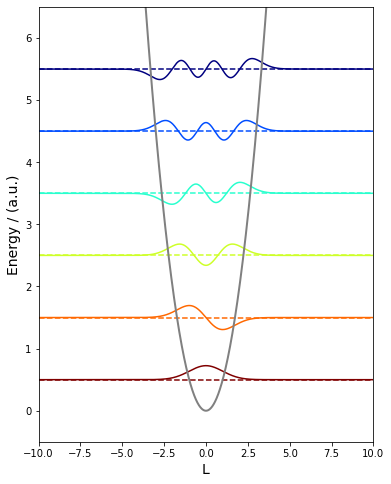

In [37]:
fig, ax = plt.subplots(figsize=(6,8))
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax.plot(xvec, 3*v + E[i], c=color)
    ax.axhline(E[i], c=color, ls='--')
ax.plot(xvec, U, c='gray', lw=2)
ax.set_xlim(xvec[0], xvec[-1])
ax.set_ylim(-E[0], E[n])
ax.set_xlabel('L', fontsize=14)
# set y label
ax.set_ylabel('Energy / (a.u.)', fontsize=14)

Text(0.5, 0, 'L')

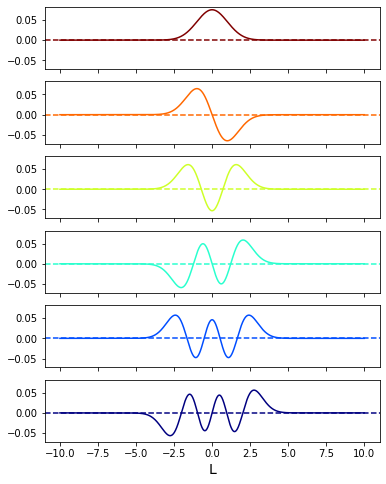

In [38]:
fig, ax = plt.subplots(n, figsize=(6,8), sharex=True, sharey=True)
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax[i].plot(xvec, v, c=color)
    ax[i].axhline(0, c=color, ls='--')
#ax[-1].set_xlim(xvec[0], xvec[-1])
ax[-1].set_xlabel('L', fontsize=14)
# set y label
#ax.set_ylabel('Energy / (a.u.)', fontsize=14)

Text(0.5, 0, 'L')

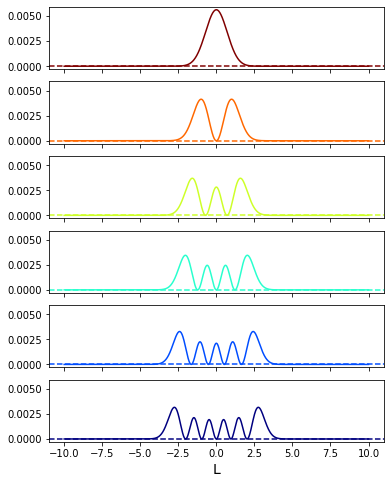

In [39]:
fig, ax = plt.subplots(n, figsize=(6,8), sharex=True, sharey=True)
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax[i].plot(xvec, v**2, c=color)
    ax[i].axhline(0, c=color, ls='--')
#ax[-1].set_xlim(xvec[0], xvec[-1])
ax[-1].set_xlabel('L', fontsize=14)
# set y label
#ax.set_ylabel('Energy / (a.u.)', fontsize=14)

### Preguntas
1. Explica las particularidades de este modelo con respecto a los anteriores.
2. ¿Cómo están espaciados los nivels de energía? 
3. ¿Qué sucede al disminuir la constante de muelle del oscilador? 
4. Haz una figura con los valores de la densidad.